In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('sample_ibm.csv')

In [5]:
df.head()

,Date,Return,1D,3D,1W,2W,3W,1M,6W,2M,3M,4M,5M,6M,9M,1Y
0,7/2/2012,0.12,2.19,0.63,0.20,-0.17,0.02,0.18,-0.03,-0.13,-0.07,0.00,0.02,0.06,0.07,0.06
1,7/3/2012,0.05,0.12,0.49,0.31,-0.12,0.12,0.20,0.01,-0.10,-0.07,-0.01,0.02,0.05,0.08,0.06
2,7/5/2012,-0.33,0.05,0.79,0.42,-0.15,0.05,0.18,-0.02,-0.08,-0.06,-0.02,0.02,0.05,0.07,0.06
3,7/6/2012,-1.99,-0.33,-0.05,0.24,-0.17,0.08,0.04,-0.02,-0.07,-0.05,-0.03,0.02,0.06,0.07,0.06
4,7/9/2012,-0.91,-1.99,-0.75,0.01,-0.10,-0.12,-0.07,-0.07,-0.12,-0.08,-0.07,0.00,0.05,0.04,0.05


In [6]:
df['Return'] = df['Return'].apply(lambda x: 1 if x >= 0 else 0)

In [7]:
df.head()

,Date,Return,1D,3D,1W,2W,3W,1M,6W,2M,3M,4M,5M,6M,9M,1Y
0,7/2/2012,1,2.19,0.63,0.20,-0.17,0.02,0.18,-0.03,-0.13,-0.07,0.00,0.02,0.06,0.07,0.06
1,7/3/2012,1,0.12,0.49,0.31,-0.12,0.12,0.20,0.01,-0.10,-0.07,-0.01,0.02,0.05,0.08,0.06
2,7/5/2012,0,0.05,0.79,0.42,-0.15,0.05,0.18,-0.02,-0.08,-0.06,-0.02,0.02,0.05,0.07,0.06
3,7/6/2012,0,-0.33,-0.05,0.24,-0.17,0.08,0.04,-0.02,-0.07,-0.05,-0.03,0.02,0.06,0.07,0.06
4,7/9/2012,0,-1.99,-0.75,0.01,-0.10,-0.12,-0.07,-0.07,-0.12,-0.08,-0.07,0.00,0.05,0.04,0.05


In [8]:
df.groupby('Return').size()

Return
0    132
1    117
dtype: int64

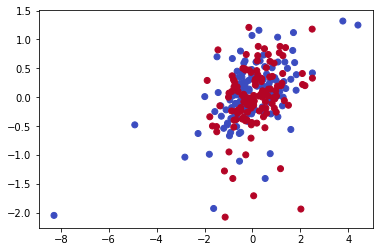

In [9]:
df2 = df[['1D','1W','Return']].sort_values(by = 'Return')

plt.scatter(df2['1D'], df2['1W'], c = df2['Return'], cmap = plt.cm.coolwarm)

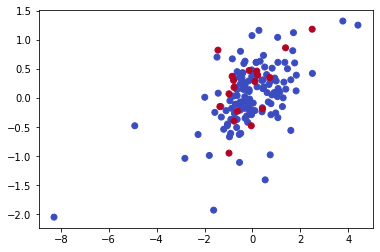

In [10]:
df2 = df2.head(150)

plt.scatter(df2['1D'], df2['1W'], c = df2['Return'], cmap = plt.cm.coolwarm)

In [1]:
from imblearn.over_sampling import SMOTE

In [11]:
seed = 1
k = 5

X = df2.loc[:, df2.columns != 'Return']
y = df2['Return']

sm = SMOTE(sampling_strategy = 'auto', k_neighbors = k, random_state = seed)

X_res, y_res = sm.fit_resample(X, y)

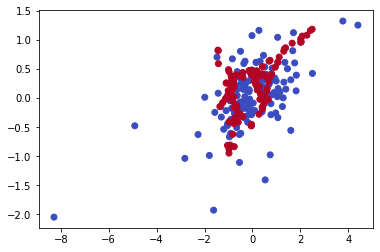

In [13]:
plt.scatter(X_res['1D'], X_res['1W'], c = y_res, cmap = plt.cm.coolwarm)

In [15]:
y_res

0      0
1      0
2      0
3      0
4      0
      ..
259    1
260    1
261    1
262    1
263    1
Name: Return, Length: 264, dtype: int64

In [43]:
from imblearn.under_sampling import NearMiss

X = df2.loc[:, df2.columns != 'Return']
y = df2['Return']

nm = NearMiss(sampling_strategy = 'auto')

X_res, y_res = nm.fit_resample(X, y)

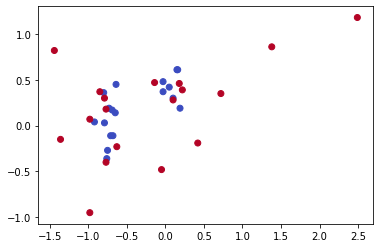

In [44]:
plt.scatter(X_res['1D'], X_res['1W'], c = y_res, cmap = plt.cm.coolwarm)

In [ ]:
def oversampling(data, y_label, k = 5, seed = 1):
    
    from imblearn.over_sampling import SMOTE

    X = data.loc[:, data.columns != y_label]
    y = data[y_label]

    sm = SMOTE(sampling_strategy = 'auto', k_neighbors = k, random_state = seed)

    X_res, y_res = sm.fit_resample(X, y)
    
    return X_res, y_res

In [17]:
def undersampling(data, y_label, n = 3):

    from imblearn.under_sampling import NearMiss

    X = data.loc[:, data.columns != y_label]
    y = data[y_label]

    nm = NearMiss(sampling_strategy = 'auto')

    X_res, y_res = nm.fit_resample(X, y)
    
    return X_res, y_res